In [13]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from functions import read_images , mergain , split_data , model_history , class_frequency , classifiction_report , confusion_matrix

In [14]:
images1 , labels1 = read_images(folder_path = "C:\\Users\\LOQ\\Desktop\\BioSyncModels\\Data\\Random\\Chest Images" , label =  1)
images2 , labels2 = read_images(folder_path = "C:\\Users\\LOQ\\Desktop\\BioSyncModels\\Data\\Random\\RandomImages" , label =  0)
images , labels = mergain(images1 , images2 , labels1 , labels2)
train_images , test_images , train_labels , test_labels = split_data(images , labels)

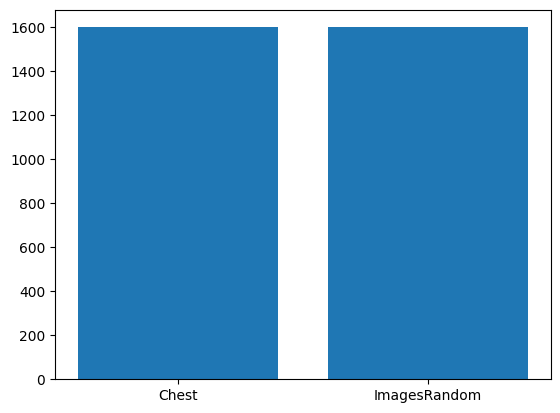

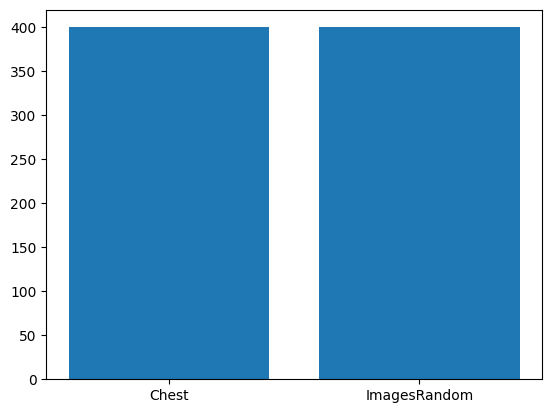

In [15]:
class_frequency(train_labels , label_name = ["Chest" , "ImagesRandom"])
class_frequency(test_labels , label_name = ["Chest" , "ImagesRandom"])

In [16]:
CheckPoint = ModelCheckpoint("BestModel.h5" , monitor = "val_accuracy" , verbose = 1 , save_best_only = True , mode = "auto" , save_weights_only = False , period = 1)

Model = tf.keras.models.Sequential()

Model.add(tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3, 3) , activation = "relu" , input_shape = (128, 128, 3)))
Model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2)))

Model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3, 3) , activation = "relu"))
Model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2)))

Model.add(tf.keras.layers.Dropout(rate = 0.25))

Model.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3, 3) , activation = "relu"))
Model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2)))

Model.add(tf.keras.layers.Flatten())
Model.add(tf.keras.layers.Dense(activation = "relu" , units = 128))
Model.add(tf.keras.layers.Dense(activation = "sigmoid" , units = 1))

Model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics = ["accuracy"])

history = Model.fit(train_images , train_labels , validation_data = (test_images , test_labels) , epochs = 5 , callbacks = [CheckPoint])

Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 19.6376 - accuracy: 0.8866
Epoch 1: val_accuracy improved from -inf to 0.98125, saving model to BestModel.h5
100/100 [==============================] - 4s 22ms/step - loss: 19.6376 - accuracy: 0.8866 - val_loss: 0.0654 - val_accuracy: 0.9812
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9891
Epoch 2: val_accuracy did not improve from 0.98125
100/100 [==============================] - 2s 19ms/step - loss: 0.0362 - accuracy: 0.9891 - val_loss: 0.0704 - val_accuracy: 0.9787
Epoch 3/5
100/100 [==============================] - ETA: 0s - loss: 0.0807 - accuracy: 0.9759
Epoch 3: val_accuracy did not improve from 0.98125
100/100 [==============================] - 2s 19ms/step - loss: 0.0807 - accuracy: 0.9759 - val_loss: 0.1283 - val_accuracy: 0.9712
Epoch 4/5
100/100 [==============================] - ETA: 0s - loss: 0.0943 - accuracy: 0.9722
Epoch 4: val_accuracy did not improve 

In [18]:
Model = tf.keras.models.load_model("BestModel.h5")
Model.evaluate(test_images , test_labels)   

25/25 [==============================] - 1s 12ms/step - loss: 0.0654 - accuracy: 0.9812


[0.06543579697608948, 0.981249988079071]

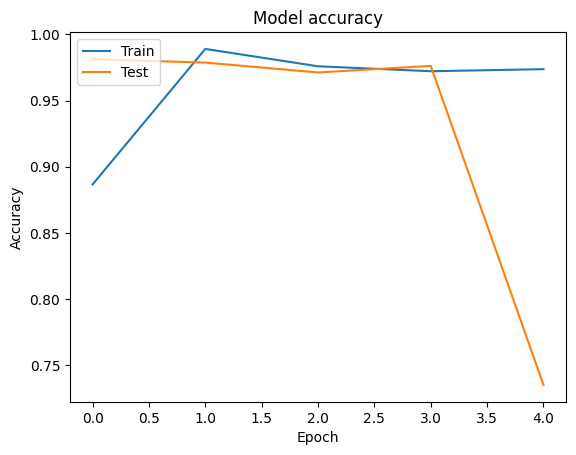

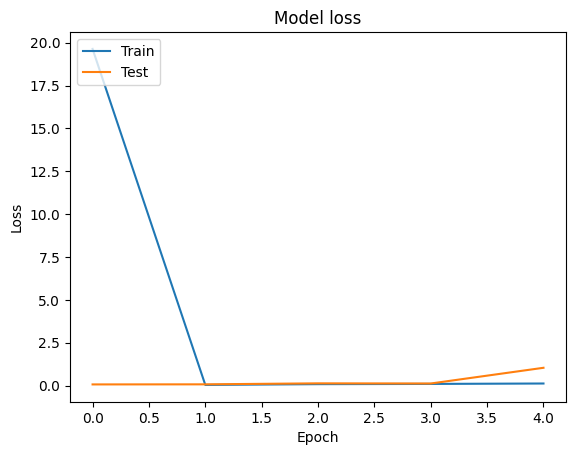

In [17]:
model_history(history)

In [19]:
Prediction = Model.predict(test_images)
classifiction_report(test_labels , Prediction)

25/25 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       400
           1       0.97      0.99      0.98       400

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



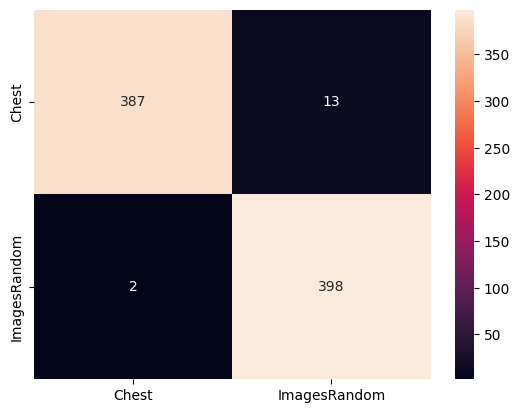

In [20]:
confusion_matrix(test_labels , Prediction , label_name = ["Chest" , "ImagesRandom"])